<a href="https://colab.research.google.com/github/PatLeRana/deeplearning/blob/master/stockPredict_DLBatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
#import for stock data visaulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#import for reading from yahoo fin
from pandas_datareader import data
from datetime import datetime

In [0]:
#define stocks to be used for data analysis
stock_list = ['AAPL', 'GOOG', 'MSFT', 'YNDX']
#start and end date for fetching data
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
for stock_symbol in stock_list:
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'yahoo', start , end)

In [0]:
# THAT ONE is straight forward
stock_list = ['AAPL', 'GOOG', 'MSFT', 'YNDX']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day-1)
stocksData = []
for stock_symbol in stock_list:
    stockData = data.DataReader(stock_symbol, 'yahoo', start , end)
    stocksData.append(stockData)

In [22]:
stocksData[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,193.512510,189.691753,191.590996,191.675817,3.238677e+07,189.924137
std,21.583597,21.305024,21.405314,21.430727,1.407218e+07,20.994390
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.934998,173.945000,174.805000,174.919998,2.277125e+07,174.248970
50%,191.970001,189.339996,190.710007,190.910004,2.880760e+07,188.461243
75%,210.089996,206.904999,208.610001,208.875000,3.868800e+07,206.743652
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [23]:
#view summary stocks of Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,193.527960,189.699920,191.604440,191.688200,3.244647e+07,189.940824
std,21.625503,21.347368,21.447191,21.472818,1.406853e+07,21.034837
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.902496,173.942501,174.737499,174.894997,2.280395e+07,174.224064
50%,191.974998,189.400002,190.895004,190.915001,2.885720e+07,188.515419
75%,210.104996,206.977501,208.915001,208.877502,3.872585e+07,206.773453
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [24]:
stocksData[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-05-25 to 2019-05-24
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


In [0]:
AAPL=stocksData[0]

In [0]:
import pandas as pd
#create a pandas DataFrame for AAPL stock
AAPL_ds = pd.DataFrame(AAPL['Adj Close'])

In [27]:
AAPL_ds.shape

(251, 1)

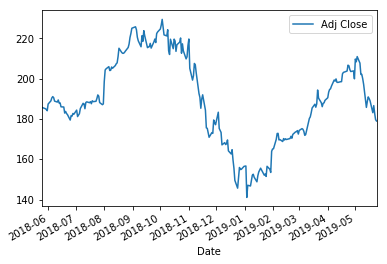

In [0]:
AAPL_ds.plot()

In [0]:
aapl_arr = AAPL_ds.iloc[:,0].values
#this return all the rows for index 0

In [30]:
aapl_arr.shape

(251,)

In [31]:
aapl_arr[0]

185.7524871826172

In [0]:
# that constructs the batch skelton
import numpy as np
def next_batch(batch_size,num_steps):
    x_batch = np.zeros((batch_size,num_steps))
    y_batch = np.zeros((batch_size,num_steps))
    # this return array of zeros with the given shape, dtype, and order.
    
    for i in range(batch_size):
        stindex = np.random.randint(0,250-num_steps-1)
        #print(stindex)
        endindex = stindex + num_steps
        x_batch[i] = aapl_arr[stindex: stindex + num_steps]
        y_batch[i] = aapl_arr[stindex+1: stindex+num_steps+1]
    return x_batch, y_batch


In [0]:
x_batch, y_batch  = next_batch(10,20)

In [39]:
x_batch.shape, y_batch.shape

((10, 20), (10, 20))

In [41]:
x_batch[1]

array([217.26367188, 213.80407715, 209.79092407, 210.83868408,
       216.33451843, 219.65576172, 205.08583069, 199.2638092 ,
       201.4186554 , 207.52732849, 206.80325317, 202.81576538,
       192.59910583, 190.67478943, 185.28874207, 189.86143494,
       191.96427917, 184.3563385 , 175.54815674, 175.34979248])

In [42]:
y_batch[1]

array([213.80407715, 209.79092407, 210.83868408, 216.33451843,
       219.65576172, 205.08583069, 199.2638092 , 201.4186554 ,
       207.52732849, 206.80325317, 202.81576538, 192.59910583,
       190.67478943, 185.28874207, 189.86143494, 191.96427917,
       184.3563385 , 175.54815674, 175.34979248, 170.89611816])

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
import tensorflow as tf
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [48]:
# using RNN model OutputProjectionWrapper
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [49]:
# predicitions
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
learning_rate = 0.001

# MSE Error
loss = tf.reduce_mean(tf.square(outputs - y))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)  

init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()
n_iterations = 10000
batch_size = 15

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        X_batch = X_batch.reshape(batch_size,n_steps,1)
        y_batch = y_batch.reshape(batch_size,n_steps,1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_stock_series_model") # not shown in the content

In [53]:
with tf.Session() as sess:                          # not shown in the content
    saver.restore(sess, "./my_stock_series_model")   # not shown

    X_new = aapl_arr[70:90]
    X_new = X_new.reshape(1,20,1)
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    y_true= aapl_arr[71:91]
    print(y_pred)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_stock_series_model
[[[224.40613]
  [219.84033]
  [217.54617]
  [214.3065 ]
  [221.60341]
  [216.11847]
  [222.0458 ]
  [219.2894 ]
  [215.19052]
  [216.3915 ]
  [215.67407]
  [211.03114]
  [215.7978 ]
  [216.65659]
  [218.45676]
  [220.41553]
  [222.5786 ]
  [221.63731]
  [221.65637]
  [224.80057]]]


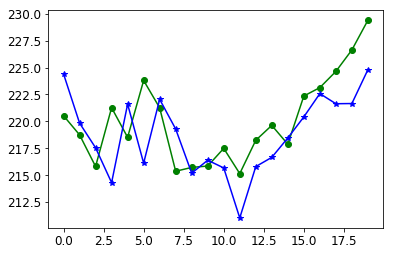

In [54]:
plt.plot(y_true, marker="o", color="green")
plt.plot(y_pred.ravel(), marker="*", color="blue")

In [55]:
#View First 5 records
AAPL_ds.head()

,Adj Close
Date,
2018-05-25,185.752487
2018-05-29,185.082672
2018-05-30,184.688675
2018-05-31,184.068115
2018-06-01,187.387604


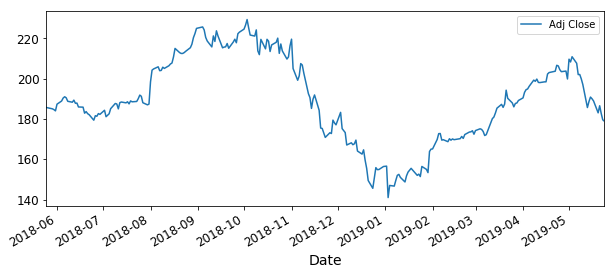

In [56]:
AAPL_ds.plot(legend=True, figsize=(10,4))

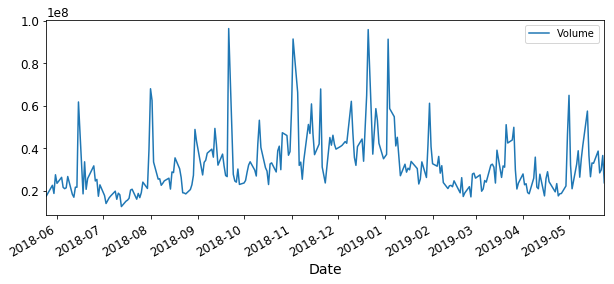

In [57]:
#view volume of stock traded every day
AAPL['Volume'].plot(legend=True, figsize=(10,4))

NameError: ignored

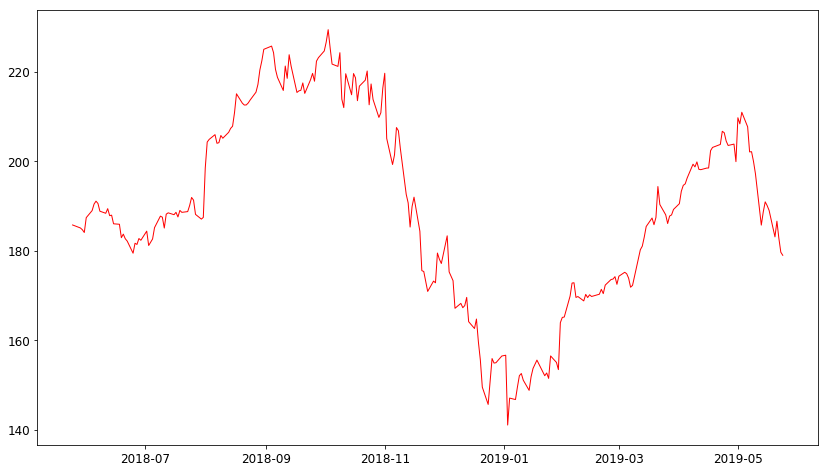

In [58]:
#plot all stock performances  on Adj close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Adj Close'], 'r', label='Apple', linewidth=1)
plt.plot(AMZN['Adj Close'], 'b', label='Amazon', linewidth=1)
plt.plot(MSFT['Adj Close'], 'g', label='Microsoft', linewidth=1)
plt.plot(GOOG['Adj Close'], 'm', label='Google', linewidth=1)
plt.legend()
plt.show()

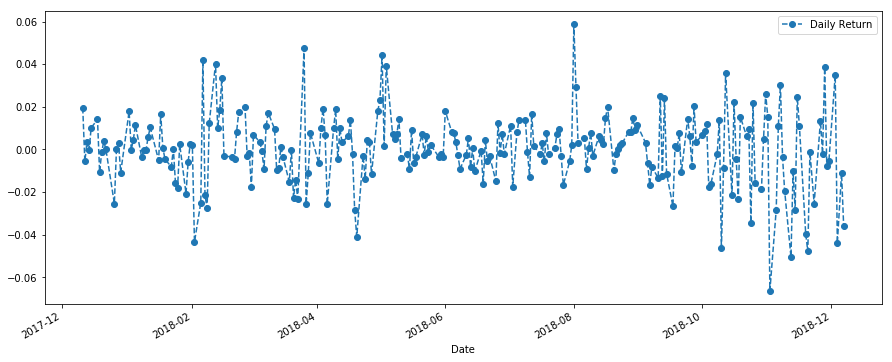

In [0]:
#computing pc chnage
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [0]:
#Fetch closing prices
closing_price_stock = data.DataReader(['AAPL', 'AMZN', 'MSFT', 'GOOG'], 'yahoo', start , end)['Adj Close']

In [0]:
closing_price_stock.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-14,169.672668,1174.260010,1049.150024,83.248863
2017-12-15,171.396790,1179.140015,1064.189941,85.372101
2017-12-18,173.810547,1190.579956,1077.140015,84.910088
2017-12-19,171.958359,1187.380005,1070.680054,84.369461
2017-12-20,171.771179,1177.619995,1064.949951,84.064720


In [0]:
stock_returns = closing_price_stock.pct_change()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


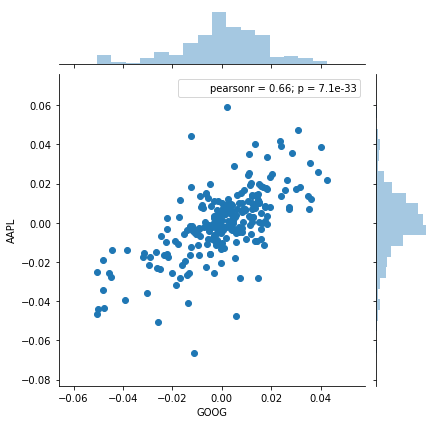

In [0]:
#compare daily returns of Google and Apple
sns.jointplot('GOOG', 'AAPL', stock_returns,kind='scatter')

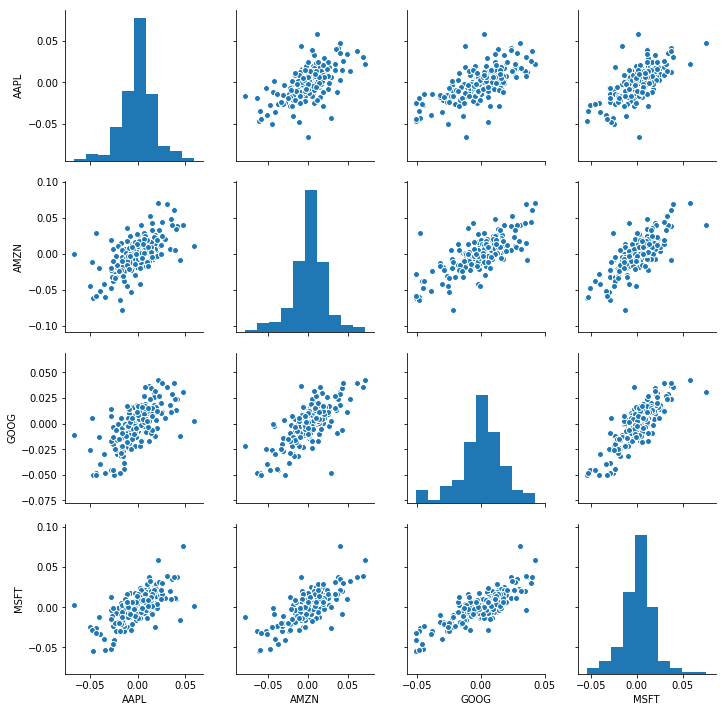

In [0]:
sns.pairplot(stock_returns.dropna())